<a href="https://colab.research.google.com/github/teazaw/MAT421-Applied-Computational-Methods/blob/main/MAT421_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numerical Integration Problem**

The numerical integration problem statement is defined as follows:

**Given:** A function 𝑓(x) that is continuous (or piecewise continuous) over an interval [𝑎,𝑏].

**Goal:** Estimate the definite integral


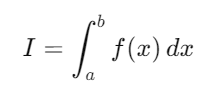


Some common numerical integration methods are the Riemann Sum, Trapezoidal Rule, and Simpson's Rule.
Each method approximates the area under *f(x)* for each subinterval by a shape for which it is easy to compute the exact area, and then sums the area contributions of every subinterval.

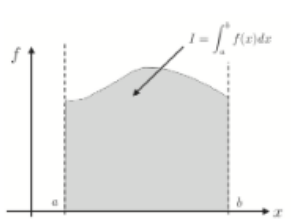

Trapezoidal Rule Result: 1.9835235375094546
Simpson's Rule Result: 2.0001095173150043
SciPy quad Integration Result: 2.0


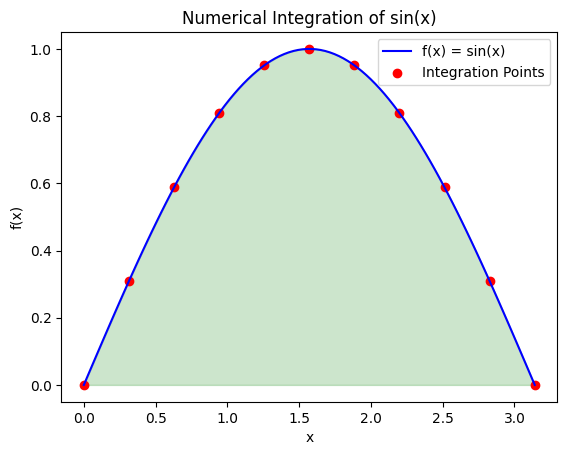

In [2]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt


def f(x):
    return np.sin(x)


a, b = 0, np.pi

# trapezoidal rule
def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    integral = (h/2) * (y[0] + 2 * sum(y[1:-1]) + y[-1])
    return integral

# simpson's rule
def simpsons_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    integral = (h/3) * (y[0] + 4 * sum(y[1:-1:2]) + 2 * sum(y[2:-2:2]) + y[-1])
    return integral


n = 10
trap_result = trapezoidal_rule(f, a, b, n)
simpson_result = simpsons_rule(f, a, b, n)
sci_result, _ = spi.quad(f, a, b)  # scipy integration


print(f"Trapezoidal Rule Result: {trap_result}")
print(f"Simpson's Rule Result: {simpson_result}")
print(f"SciPy quad Integration Result: {sci_result}")
x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='f(x) = sin(x)', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.2, color='green')
plt.scatter(np.linspace(a, b, n+1), f(np.linspace(a, b, n+1)), color='red', label='Integration Points')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Numerical Integration of sin(x)")
plt.show()


# **Riemanns Integral**
Riemann's Integral is a formal definition of integration based on the concept of **Riemann sums**.  It provides a way to define the integral of a function over an interval by approximating the area under the curve using sums of rectangles.


Mathematically, it appears as:



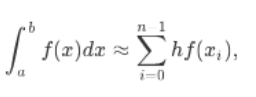

or

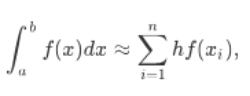


There are several types of Riemann sums:
1. Left Riemann sum
2. Right Riemann sum
3. Midpoint Riemann sum

If *f(x)* is continuous over the desired interval, the Riemann integral always exists. This integral is the foundation of definite integration and the Fundamental Theorem of Calculus.

Left Riemann Sum: 1.9835235375094544
Right Riemann Sum: 1.9835235375094549
Midpoint Riemann Sum: 2.0082484079079745


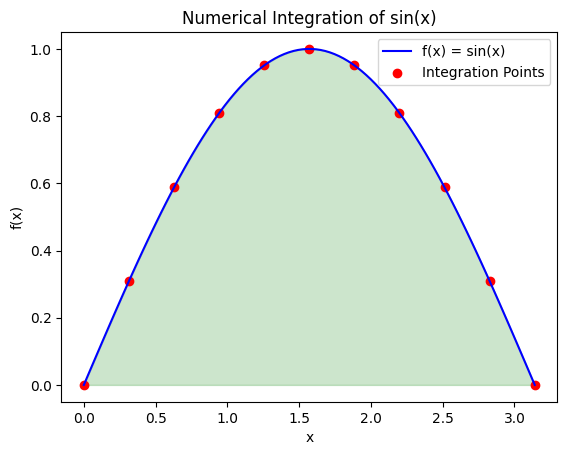

In [4]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt


def f(x):
    return np.sin(x)


a, b = 0, np.pi

# Riemann Sum Implementation
def riemann_sum(f, a, b, n, method="midpoint"):
    x = np.linspace(a, b, n+1)
    dx = (b - a) / n
    if method == "left":
        x_points = x[:-1]
    elif method == "right":
        x_points = x[1:]
    else:
        x_points = (x[:-1] + x[1:]) / 2
    integral = np.sum(f(x_points) * dx)
    return integral



n = 10
left_riemann = riemann_sum(f, a, b, n, method="left")
right_riemann = riemann_sum(f, a, b, n, method="right")
midpoint_riemann = riemann_sum(f, a, b, n, method="midpoint")



print(f"Left Riemann Sum: {left_riemann}")
print(f"Right Riemann Sum: {right_riemann}")
print(f"Midpoint Riemann Sum: {midpoint_riemann}")



x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='f(x) = sin(x)', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.2, color='green')
plt.scatter(np.linspace(a, b, n+1), f(np.linspace(a, b, n+1)), color='red', label='Integration Points')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Numerical Integration of sin(x)")
plt.show()


#**Trapezoidal Rule**
The **Trapezoidal** **Rule** is a numerical method for approximating definite integrals. It works by dividing the area under a curve into trapezoids instead of rectangles (as in Riemann sums).

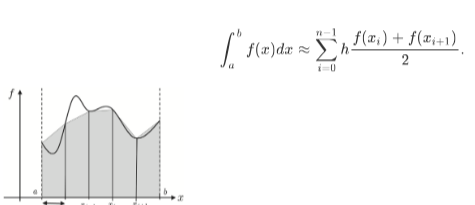

The expansion of the Trapezoid Rule is as follows:

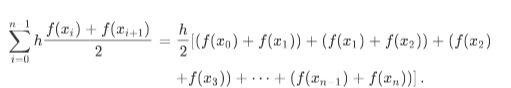

In summary, the function is approximated by straight-line segments between sample points. Each segment forms a trapezoid, whose area is calculated and summed.More subintervals (𝑛) improve accuracy.

Trapezoidal Rule Result: 1.9835235375094546


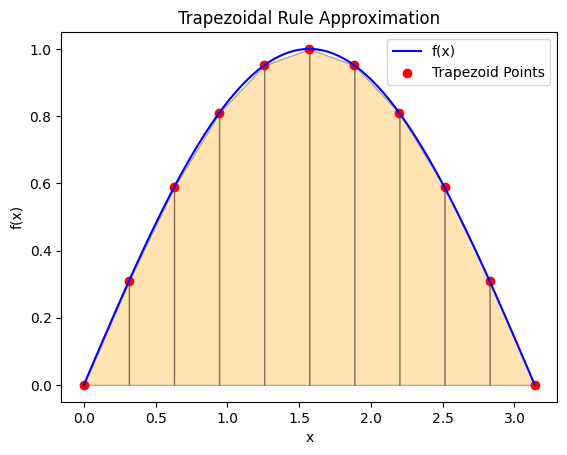

In [8]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt


def f(x):
    return np.sin(x)


a, b = 0, np.pi

# Trapezoidal Rule Implementation
def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    integral = (h/2) * (y[0] + 2 * sum(y[1:-1]) + y[-1])
    return integral

# Visualizing the Trapezoidal Rule
def plot_trapezoidal(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    plt.plot(np.linspace(a, b, 100), f(np.linspace(a, b, 100)), label='f(x)', color='blue')
    for i in range(n):
        plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]], alpha=0.3, color='orange', edgecolor='black')
    plt.scatter(x, y, color='red', label='Trapezoid Points')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Trapezoidal Rule Approximation")
    plt.legend()
    plt.show()



n = 10
trap_result = trapezoidal_rule(f, a, b, n)
print(f"Trapezoidal Rule Result: {trap_result}")
plot_trapezoidal(f, a, b, n)
